In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
im = Image.open('data/kymograph_vitro.tif')

print(im.format, im.size, im.mode)

TIFF (2630, 2081) F


2630 2081


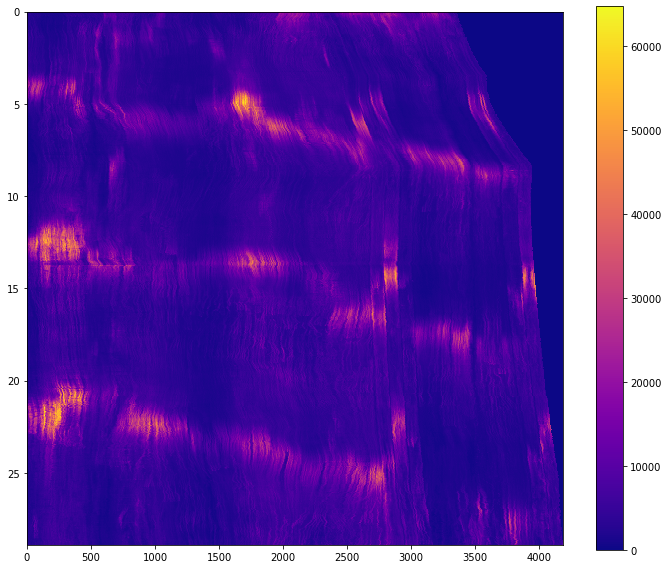

In [7]:
imarray = np.array(im) 
T, Lx = imarray.shape
print(Lx, T)
fig = plt.figure(figsize=(12, 10))
plt.imshow(imarray, interpolation='none', cmap='plasma', aspect=24*6, extent=[0, Lx*1.59, T/3/24, 0])
plt.colorbar() 
plt.show() 

In [8]:
im = Image.open('data/kymograph_vivo.tif')

print(im.format, im.size, im.mode)

TIFF (1200, 347) F


1200 347


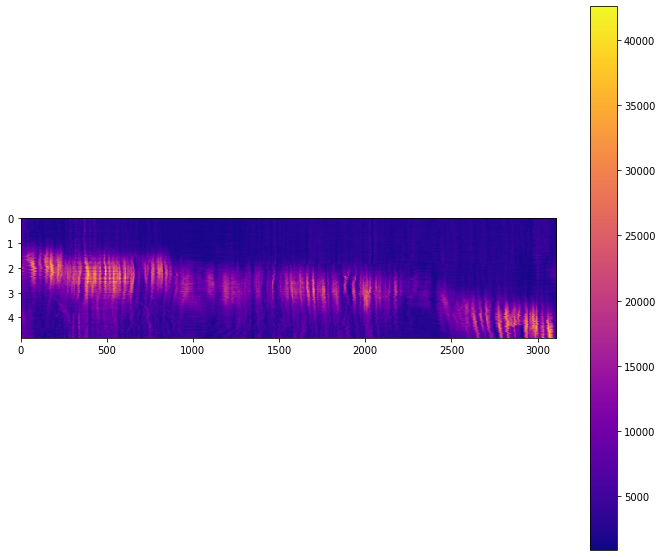

In [10]:
imarray = np.array(im) 
T, Lx = imarray.shape
print(Lx, T)
fig = plt.figure(figsize=(12, 10))
plt.imshow(imarray, interpolation='none', cmap='plasma', aspect=24*6, extent=[0, Lx*2.59, T/3/24, 0])
plt.colorbar() 
plt.show() 